In [2]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [3]:
from utils import *
from plottings import *
from ab_testing import *

In [4]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9396\1487130439.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


# Explanatory Data Analysis 

## 1. Understanding the Data

In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [7]:
df.shape

(1000098, 52)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [10]:
df[['TotalClaims', 'TotalPremium']].describe()

,TotalClaims,TotalPremium
count,1.000098e+06,1.000098e+06
mean,6.486119e+01,6.190550e+01
std,2.384075e+03,2.302845e+02
min,-1.200241e+04,-7.825768e+02
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.178333e+00
75%,0.000000e+00,2.192982e+01
max,3.930921e+05,6.528260e+04


## 2. Missing values and filling them

### missing values

In [11]:
missing_values_table(df)

Your selected dataframe has 52 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
NumberOfVehiclesInFleet,1000098,100.0
CrossBorder,999400,99.9
CustomValueEstimate,779642,78.0
Converted,641901,64.2
Rebuilt,641901,64.2
WrittenOff,641901,64.2
NewVehicle,153295,15.3
Bank,145961,14.6
AccountType,40232,4.0
Gender,9536,1.0


### Since over 99% of users are from South Africa ('ZA'), and the company is based there, empty citizenship values were replaced with 'ZA'.

In [12]:
# Replace NaN, empty strings, or whitespace-only strings with 'ZA'
df['Citizenship'] = df['Citizenship'].apply(lambda x: 'ZA' if pd.isna(x) or x.strip() == '' else x)


### The columns 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate' all have the same 552 null values, indicating a correlation. Dropping one column from this group can resolve the missing data issue.

In [13]:
df.dropna(subset=['mmcode'], inplace=True)

### Gender and Maritialstatus columns' null values replaced by "Not Specified" and missing Bank column replaced by "unknown".

In [14]:
df.MaritalStatus.fillna('Not specified', inplace=True)
df.Gender.fillna('Not specified', inplace=True)
df.AccountType.fillna('Not specified', inplace=True)
df.Bank.fillna('Unknown', inplace=True)

### NumberOfVehiclesInFleet, CrossBorder and CustomValueEstimate columns are dropped due to high number of missing values(100, 99 and 78%).

In [15]:
df.drop(['NumberOfVehiclesInFleet','CrossBorder', 'CustomValueEstimate' ], axis=1, inplace=True)



### WrittenOff, Rebuilt and Converted have equal percentage of missing values, indicating a correlation. As they are categorical columns, the missing values are replaced with Mode value, which is "No" for all three columns. And NewVehicle column replaced with mode value, More than 6 months

In [16]:
df.WrittenOff.fillna('No', inplace=True)
df.Rebuilt.fillna('No', inplace=True)
df.Converted.fillna('No', inplace=True)
df.NewVehicle.fillna('More than 6 months', inplace=True)


### CapitalOutstanding column has 2 missing values, which are replaced with the mean value of the column.

In [17]:
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean(), inplace=True)


### Missing Values after the 'missing value operations'

In [18]:
missing_values_table(df)

Your selected dataframe has 49 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 3. Date columns 

## VehicleIntroDate and TransactionMonth columns are converted to datetime format.

In [19]:
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], format='%m/%Y', errors='coerce')

In [20]:
# Convert to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Format to MM/YYYY
df['TransactionMonthFormatted'] = df['TransactionMonth'].dt.to_period('M')

In [21]:
# saving the cleaned data
df.to_csv('../data/cleaned_data.csv', index=False)
 


## 5. Univariate Analysis

### Histograms for numerical columns

c:\Insurance-Claim-Analytics\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Insurance-Claim-Analytics\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Insurance-Claim-Analytics\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Insurance-Claim-Analytics\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


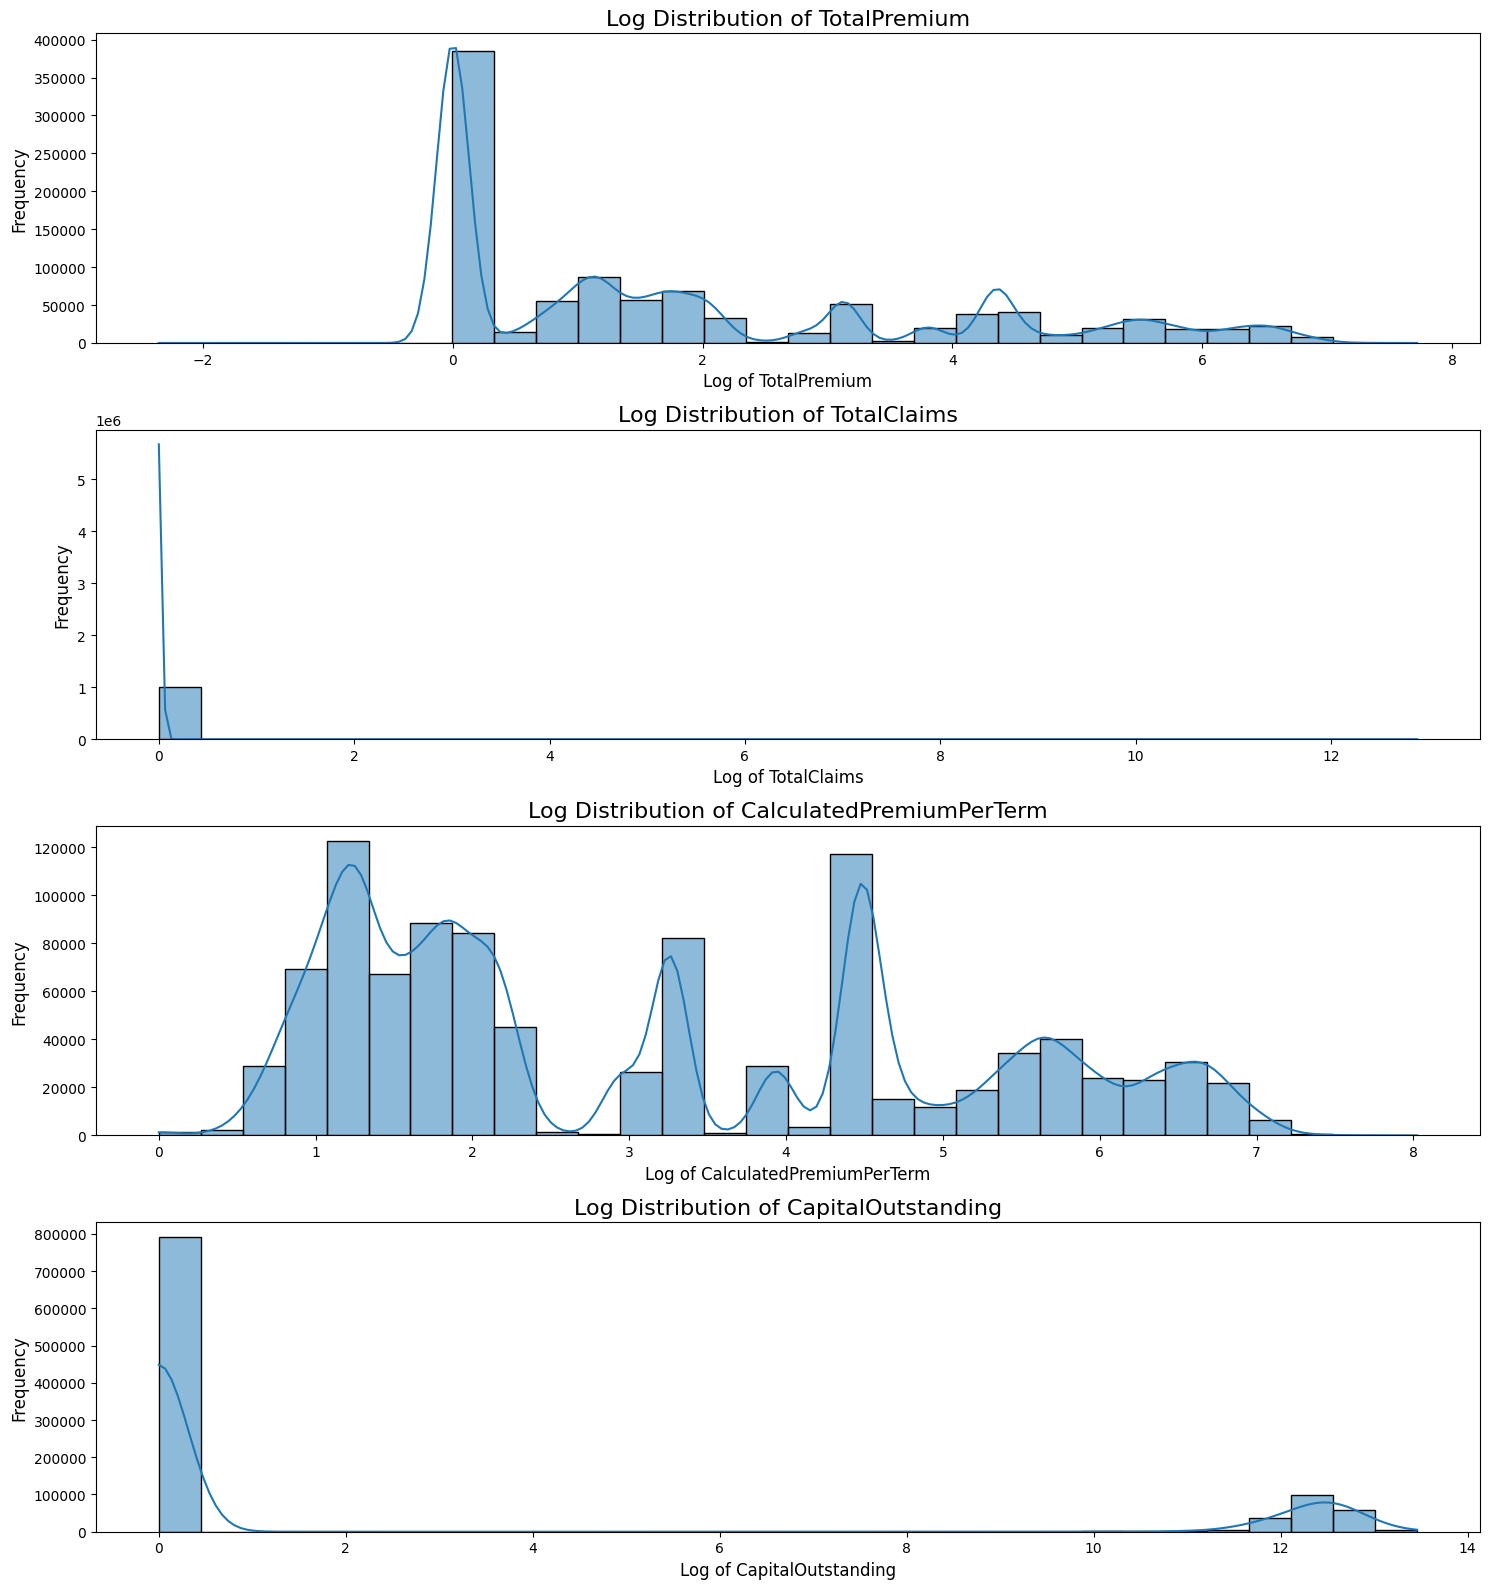

In [22]:
univariate_num_columns = ['TotalPremium','TotalClaims','CalculatedPremiumPerTerm', 'CapitalOutstanding']
plot_histograms(df, univariate_num_columns)

### bar charts for categorical columns

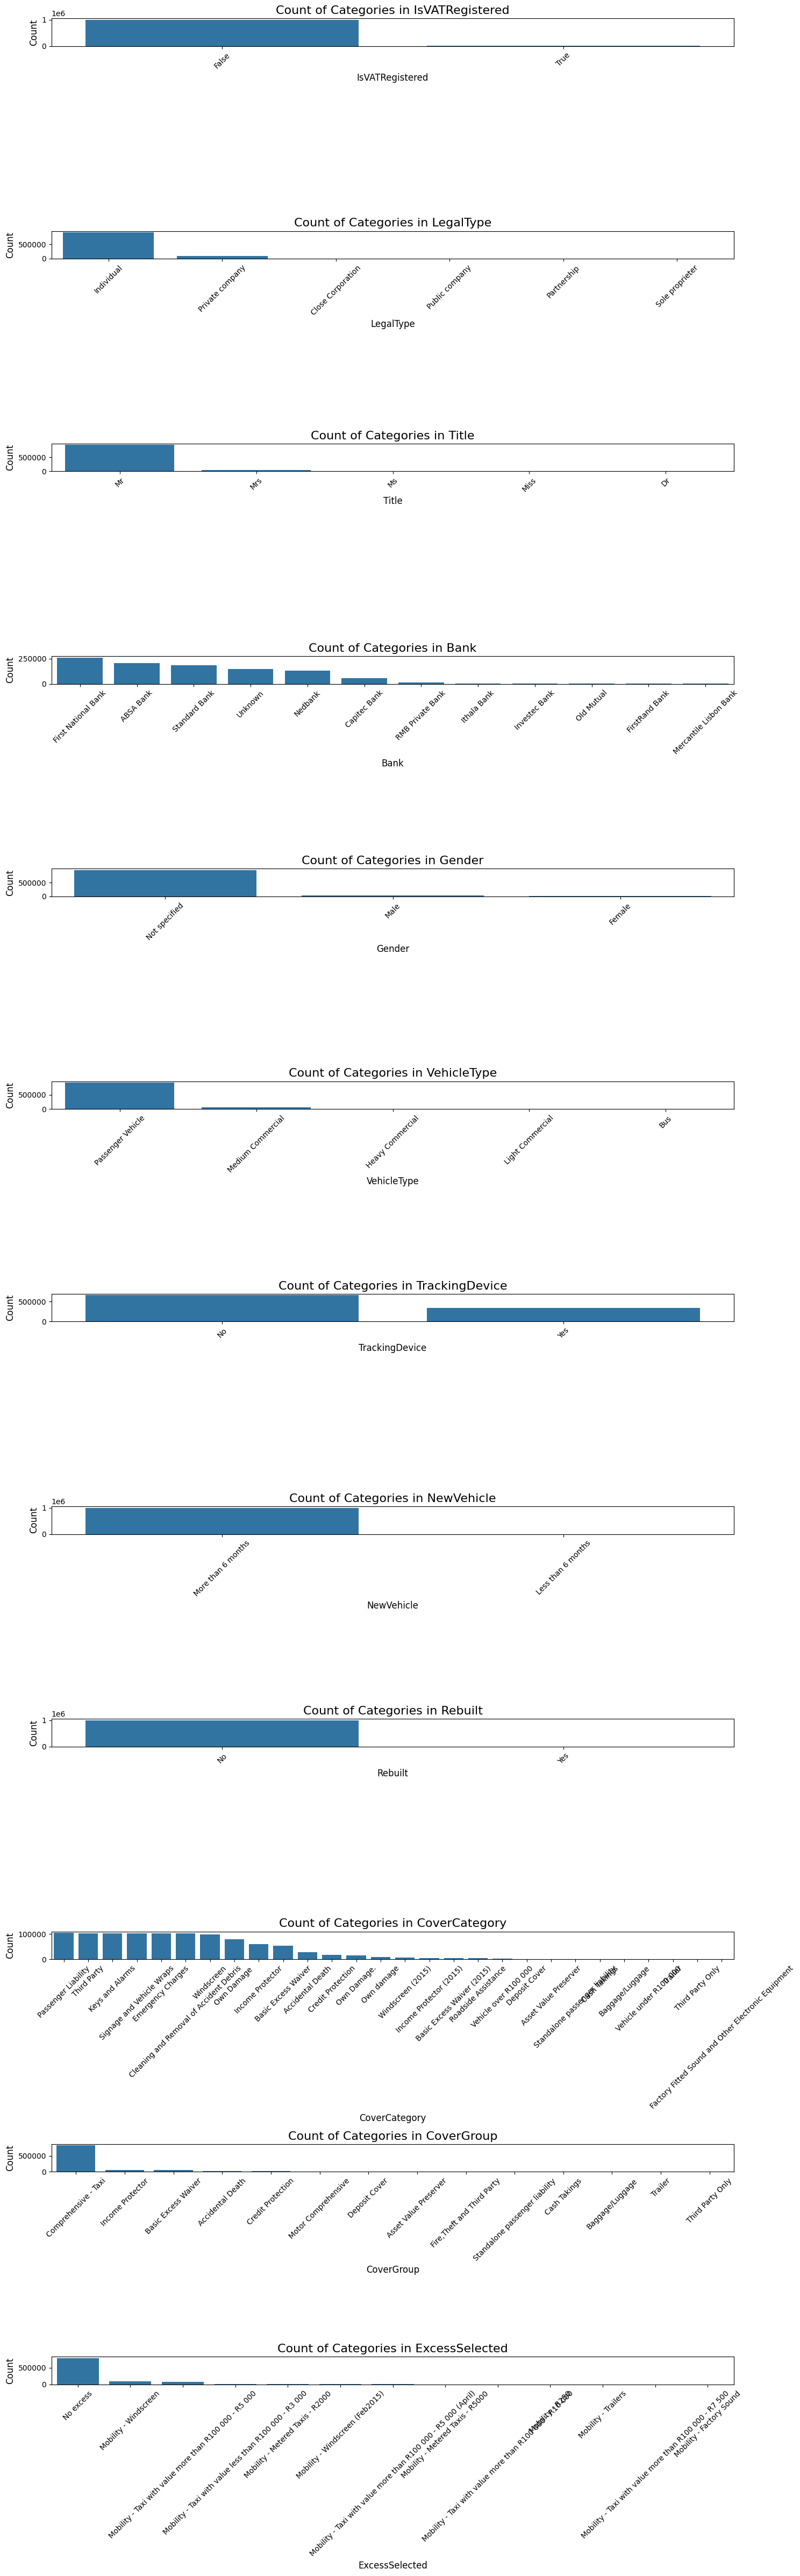

In [23]:
univariate_cat_columns = ['IsVATRegistered', 'LegalType','Title', 'Bank','Gender','VehicleType', 'TrackingDevice', 'NewVehicle', 'Rebuilt', 'CoverCategory', 'CoverGroup', 'ExcessSelected']
plot_bar_charts(df, univariate_cat_columns)

### Bivariate Analysis

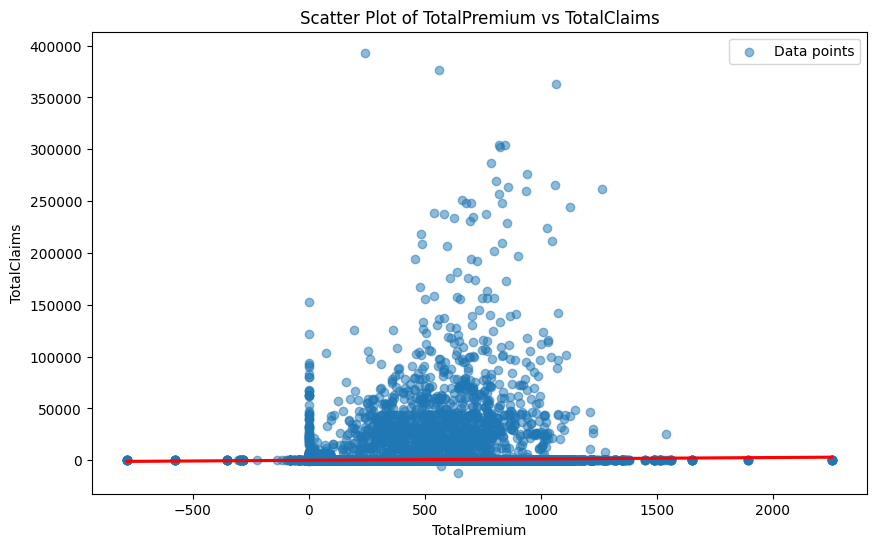

Correlation between TotalPremium and TotalClaims: 0.09


In [24]:
bivariate_analysis(df, 'TotalPremium', 'TotalClaims', show_regression_line=True)